In [45]:
import json
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [46]:
# 맷플롯 한글깨짐 방지 - 폰트 = 맑은고딕
# [IMPORTANT! : 중요! : ATTENTION!]

from IPython.display import set_matplotlib_formats
matplotlib.rc('font', family='Malgun Gothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes', unicode_minus=False)

In [ ]:
# reading the JSON data using json.load()
filename = 'fb_comments_01refine_20200318.json.ini'

In [2]:
with open(filename, mode='r', encoding='utf8') as f:
    dict_comment = json.load(f)
    
# converting json dataset from dictionary to dataframe
df = pd.DataFrame.from_dict(dict_comment, orient='index')
df.reset_index(level=0, inplace=True)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    126 non-null    object
 1   name     126 non-null    object
 2   comment  126 non-null    object
 3   likes    126 non-null    object
dtypes: object(4)
memory usage: 4.1+ KB


In [4]:
likes_count = [ int(likes[0:-3]) for likes in df['likes'].values]
df['likes_count'] = pd.Series(likes_count)

# df.sort_values('likes_count', ascending=False)

df['index'] = pd.to_numeric(df['index'])
df['comment'] = df.comment.str.replace('[[데분커],]' , '')

show_cols = ['index', 'comment', 'likes_count']
df[show_cols].sort_values('index', ascending=True)        # order by time_order('index') = 글쓴순서로 나열
df[show_cols].sort_values('likes_count', ascending=False) # order by 'likes_count' = 좋아요 갯수로 나열

C:\Anaconda3\lib\site-packages\pandas\core\strings.py:713: FutureWarning: Possible nested set at position 1
  compiled = re.compile(pat, flags=flags)


,index,comment,likes_count
9,9,입맛대로 블랙리스트랑 다를게 없을 것 같은데요...,55
12,12,기레기 판단의 labelling 하는 사람의 정치색이 labelling 결과의 몹시...,41
7,7,제가 잘 몰라서 나오는 질문입니다만기레기인지 판단하기 위한 labelling 은 누...,32
1,1,그 기사가 가짜라는 것을 어떻게 판별하나요?,22
43,43,한국 기자를 외신이 비판하는 근거중 하나가. 출처의 미비입니다. 익명의 제보자 익명...,19
...,...,...,...
30,30,"해외기사 원분이 있다면 대조가 가능한데, 전화통화내용 + 노르웨이 입국조치는 개연성...",0
102,102,내참... 기자라는 직업인들이 우습다,0
83,83,대법원 판결로 가짜 뉴스라고 확정된 것으로 알고 있습니다.,0
104,104,동의합니다. 그런데 객관화된 기술시스템이 있다면 학습하는데도 도움이 되지 않을까요?,0


count    126.000000
mean       3.206349
std        7.281008
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       55.000000
Name: likes_count, dtype: float64

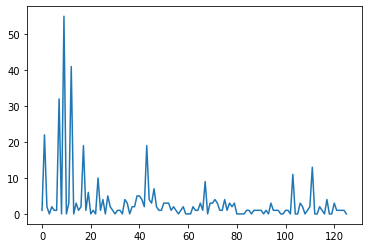

In [5]:
df.likes_count.plot()
df['likes_count'].describe()

In [21]:
# reading the JSON data using json.load()
filename_components = 'fb_comments_02refile_noun_adj_adv.txt.ini'

In [22]:
with open(filename_components, mode='r', encoding='utf8') as f:
    array_components = f.readlines()

In [114]:
dict_components = {}
dict_sole = {}
for item in array_components:
    item_striped = item.strip()

    if len(item_striped) == 1:
        if item_striped in dict_sole.keys():
            dict_sole[item_striped] += 1
        else:
            dict_sole[item_striped] = 1
    else:    
        if item_striped in dict_components.keys():
            dict_components[item_striped] += 1
        else:
            dict_components[item_striped] = 1

In [115]:
df_compo = pd.DataFrame.from_dict(dict_components, orient='index', columns=['counts'])
df_sole = pd.DataFrame.from_dict(dict_sole, orient='index', columns=['counts'])

# Set annotation on the top of the bar_horizontal

**BAR CHART ANNOTATIONS WITH PANDAS AND MATPLOTLIB**
- [[__CHECK_THIS_OUT__](https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html)]

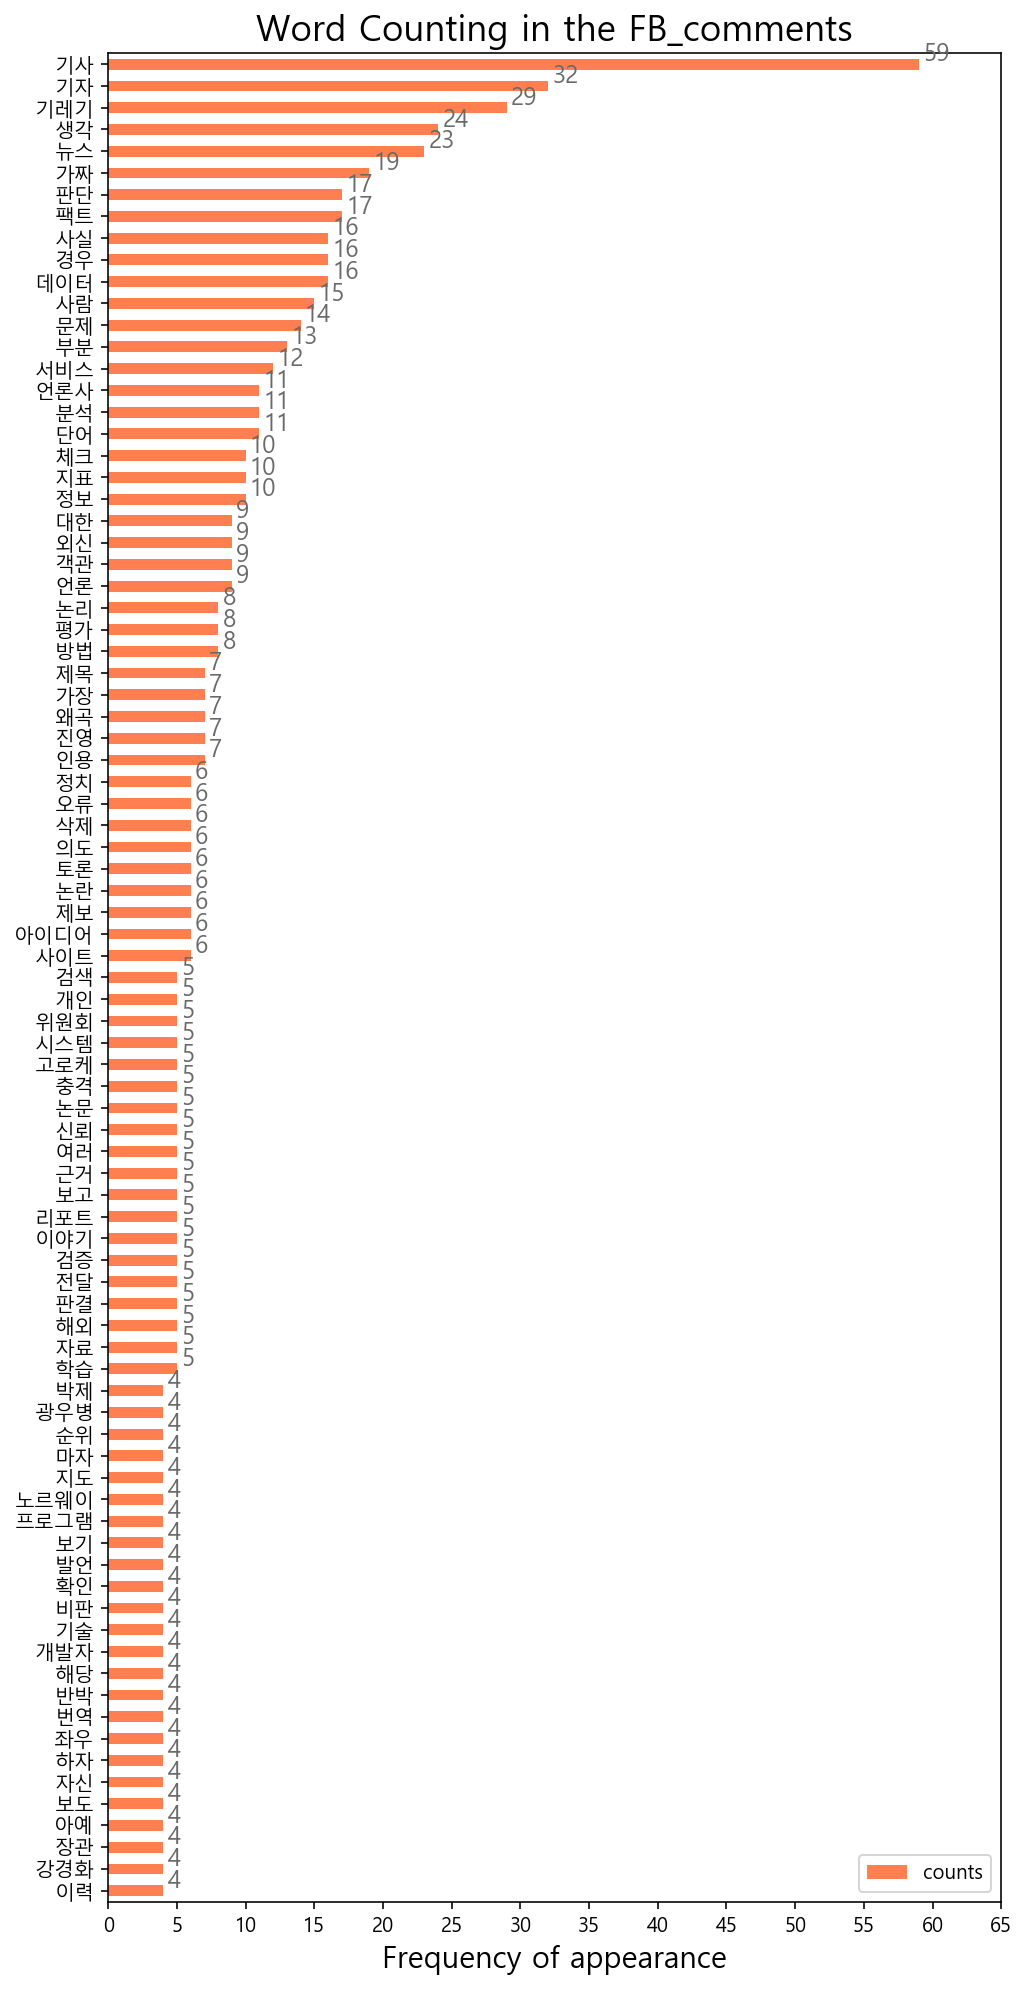

In [116]:
ax = df_compo[df_compo.counts > 3].sort_values(by='counts').plot.barh(figsize=(8,17), color='coral')

ax.set_alpha(0.8)
ax.set_title("Word Counting in the FB_comments", fontsize=18)
ax.set_xlabel("Frequency of appearance", fontsize=15);
ax.set_xticks(np.arange(0,70,5))

# create a list to collect the plt.patches data
# find the values and append to list
totals = []
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
# get_width pulls left or right; get_y pushes up or down
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, 
            # str(round((i.get_width()/total)*100, 2))+'%',     # SHOW : percentile of all
            i.get_width(),                                      # SHOW : width values
            fontsize=12,
            color='dimgrey',
       )

# invert for largest on top - descending order 
# ax.invert_yaxis()


plt.show()

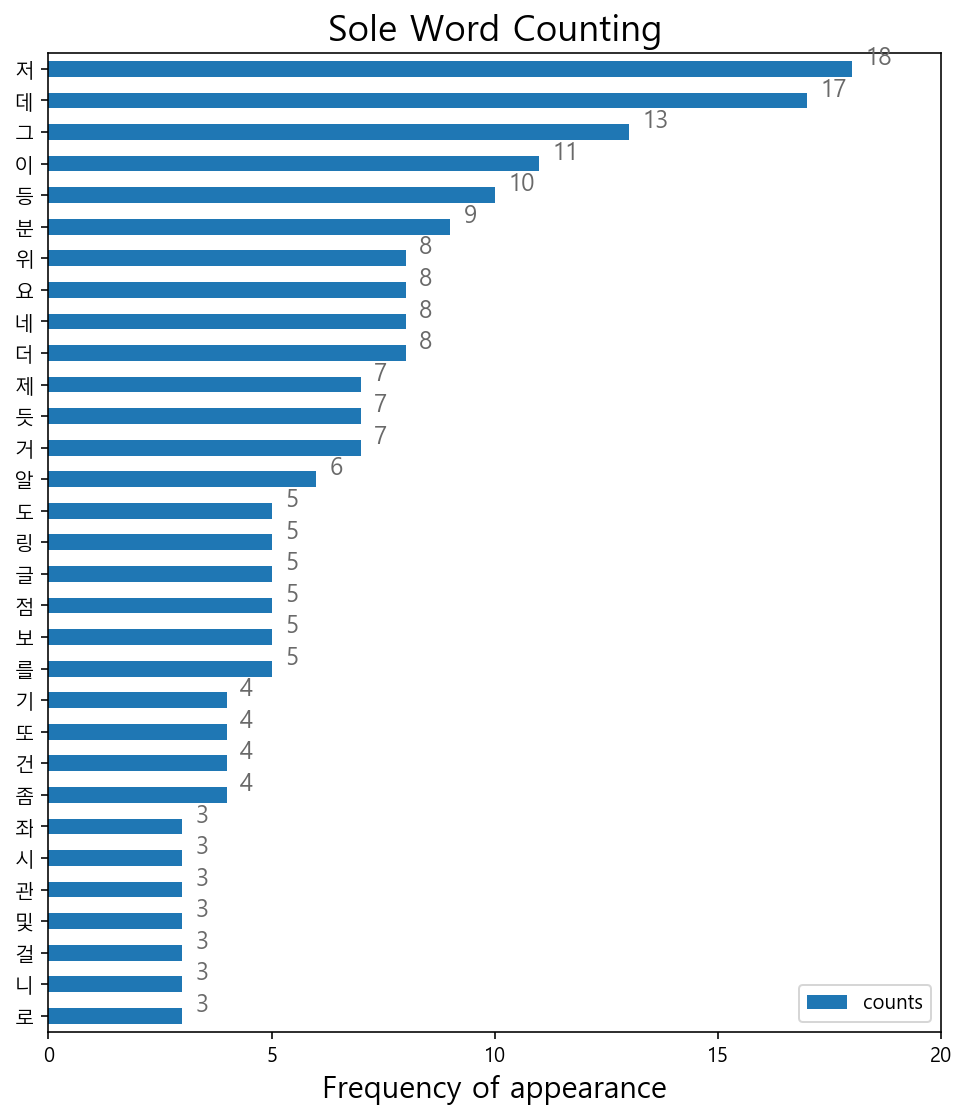

In [122]:
ax = df_sole[df_sole.counts > 2].sort_values(by='counts').plot.barh(figsize=(8,9))

ax.set_alpha(0.8)
ax.set_title("Sole Word Counting", fontsize=18)
ax.set_xlabel("Frequency of appearance", fontsize=15);
ax.set_xticks(np.arange(0,25,5))

# create a list to collect the plt.patches data
# find the values and append to list
totals = []
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
# get_width pulls left or right; get_y pushes up or down
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, 
            # str(round((i.get_width()/total)*100, 2))+'%',     # SHOW : percentile of all
            i.get_width(),                                      # SHOW : width values
            fontsize=12,
            color='dimgrey',
       )